In [2]:
# import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

In [3]:
# set display options
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)

In [4]:
# read in the data
fuel_data = pd.read_csv("https://raw.githubusercontent.com/WalePhenomenon/climate_change/master/fuel_ferc1.csv")

In [5]:
# check if data has been loaded in correctly
fuel_data.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


In [6]:
# Look at the shape of the data
fuel_data.shape

(29523, 11)

### Data Cleaning

In [7]:
# check for duplicates
fuel_data[fuel_data.duplicated(keep="first")]

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu


#### Observation:
* There's no duplicated rows/observations in the data

In [8]:
# check to ensure columns have data in the correct data type
fuel_data.dtypes

record_id                        object
utility_id_ferc1                  int64
report_year                       int64
plant_name_ferc1                 object
fuel_type_code_pudl              object
fuel_unit                        object
fuel_qty_burned                 float64
fuel_mmbtu_per_unit             float64
fuel_cost_per_unit_burned       float64
fuel_cost_per_unit_delivered    float64
fuel_cost_per_mmbtu             float64
dtype: object

In [9]:
# check for null values in the data and what percent they make up of the data
missing = fuel_data.isnull().sum()   # series with total count of null values per column
totals = fuel_data.shape[0]     # total observations
percentage = missing[missing != 0] / totals * 100
pd.concat([missing[missing != 0], percentage], axis=1, keys=["Total Missing", "Percentage"])

,Total Missing,Percentage
fuel_unit,180,0.609694


#### Observation:
* fuel_unit has 180 null observations which make up 0.6% of the data. We'll handle the missing data below

In [10]:
# Handle missing data in the fuel_unit column. 
#We'll replace the null values in the column with the mode of the column
mode = fuel_data["fuel_unit"].mode()[0]
fuel_data["fuel_unit"] = fuel_data["fuel_unit"].fillna(value=mode)

In [11]:
# check to ensure column has been imputed
fuel_data["fuel_unit"].isnull().sum()

0

### Exploratory Data Analysis (EDA)

In [12]:
# Lets get some summary statistics on the data
# Look at the numerical features
fuel_data.describe()

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523.000000,29523.000000,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
mean,118.601836,2005.806050,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,74.178353,7.025483,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,1.000000,1994.000000,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,55.000000,2000.000000,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,122.000000,2006.000000,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,176.000000,2012.000000,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000
max,514.000000,2018.000000,5.558942e+08,341.260000,139358.000000,7.964521e+06,359278.000000


In [13]:
# Look at categorical features
fuel_data.describe(exclude=np.number)

,record_id,plant_name_ferc1,fuel_type_code_pudl,fuel_unit
count,29523,29523,29523,29523
unique,29523,2315,6,9
top,f1_fuel_1996_12_164_0_13,big stone,gas,mcf
freq,1,156,11486,11534


#### Observation:
* each record has a unique id hence no duplicates

In [14]:
# Since the record_id column does not give us any insights into the data, we can drop it
fuel_data.drop("record_id", axis=1, inplace=True)

C:\Users\Kelvin Kinda\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2910: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002C6C349B710>,
      dtype=object)

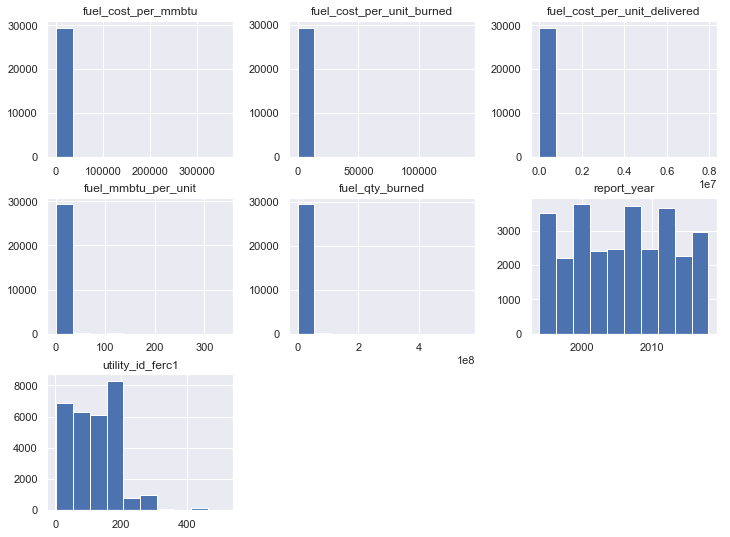

In [15]:
# Lets look at the distribution of the data
fig, ax = plt.subplots(figsize=(12,9))
fuel_data.hist(ax=ax)

#### Observations:
* There seems to be some columns with a huge range but with values residing on the lower end. We'll have to investigate this features individually

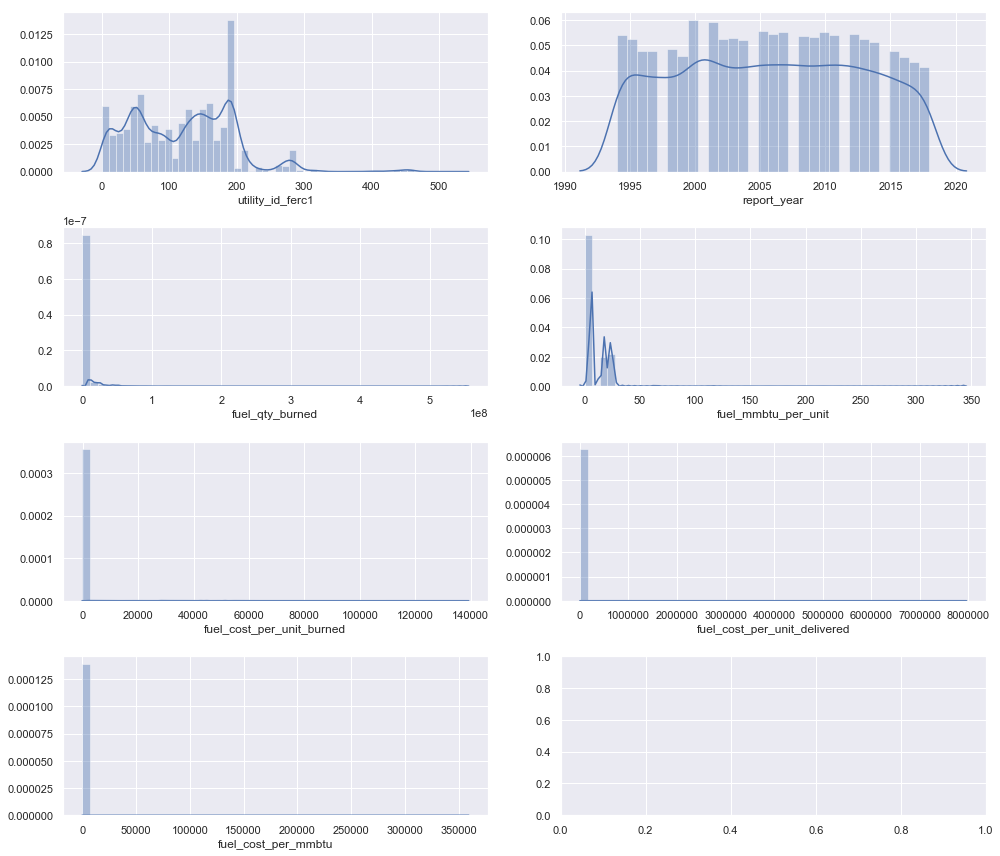

In [16]:
# Filter for numeric columns and plot their distribution plots
numeric_cols = fuel_data.columns[fuel_data.dtypes != "object"]

fig, axes = plt.subplots(4, 2, figsize=(14, 12))
axes = axes.flatten()

for col, ax in zip(numeric_cols, axes):
    sns.distplot(fuel_data[col], ax=ax)
    plt.tight_layout()

#### Observations:
* Its evident that there's outliers in our data as shown from the right skewedness of some of the columns. 
* The data is also does not represent a normal distribution with some of the distribution plots appearing as flat
* The data also shows peakedness in some of the columns

In [17]:
# Lets calculate kurtosis and skewness of the features
kurtosis = fuel_data.kurt()
skewness = fuel_data.skew()

pd.concat([kurtosis, skewness], axis=1, keys=["Kurtosis", "Skewness"])

,Kurtosis,Skewness
utility_id_ferc1,1.088432,0.605070
report_year,-1.145656,0.006953
fuel_qty_burned,651.369450,15.851495
fuel_mmbtu_per_unit,55.595695,4.135217
fuel_cost_per_unit_burned,485.255851,19.787440
fuel_cost_per_unit_delivered,11765.054226,105.014227
fuel_cost_per_mmbtu,29489.132594,171.675535


#### Observations:
* Most of the features ,except utility_id_ferc1 and report_year which have skewness close to 0 (data is symmetrical), have a positive skewness indicating they are right tailed as evident from the plots above
* Most of the features ,except utility and report year which are the closest to a normal distribution in terms of peakednes and tails, have a positive kurtosis indicating they have heavy tails and are peaked

#### Observations:
* Its evident that there are outlier in the data and they should be dealt with before feeding the data into a machine learning model.
* Transformations such as log transform or box-cox (in columns with strictly positive values) could be applied to transform the data into a normal like distribution
* The data also has a very huge range with very small and large values. Scaling the data would be a big boost to performance in train a model especially those dependent on calculating distances (SVR, KNN). It will also help in tree based algorithms though this boost might not be as big

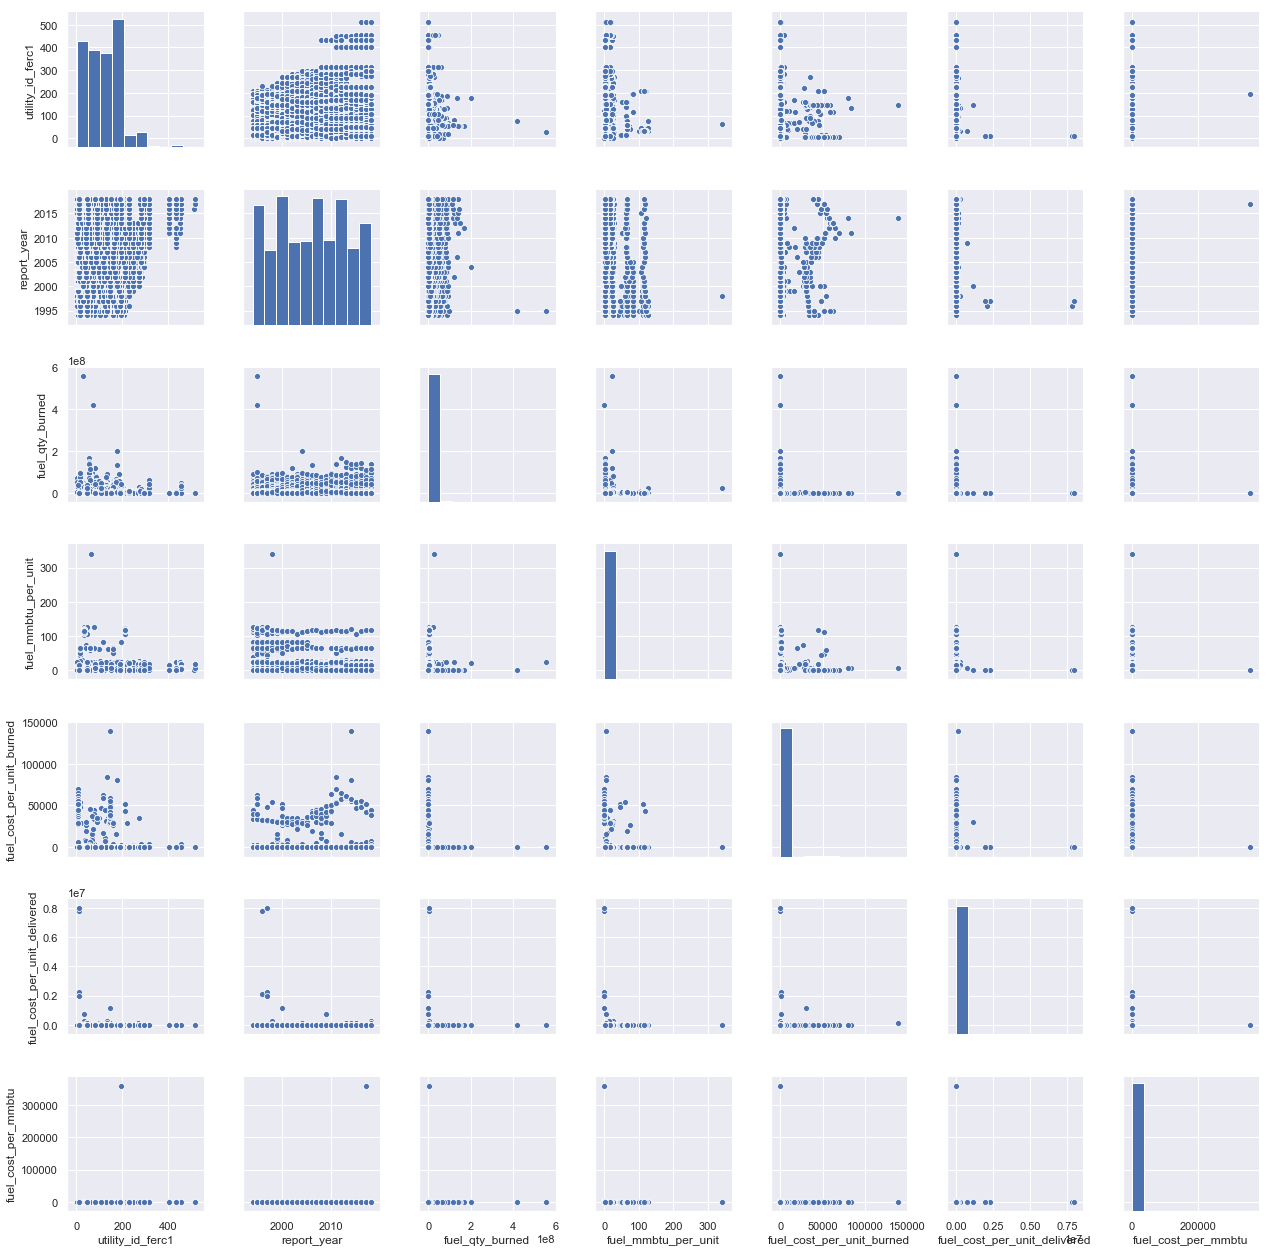

In [18]:
# Check how the data relates to each other
sns.pairplot(fuel_data)

#### Observations:
* utility_id_ferc1 and fuel_qty_burned seem to have a weak negative linear relationship i.e. as the utility_id_ferc1 increases the fuel_qty_burned decreases and vice versa
* utility_id_ferc1 and fuel_cost_per_unit_burned also seem to have a weak negative linear relationship
* fuel_mmbtu_per_unit and fuel_cost_per_unit_burned seem to have an interesting relationship with values residing in the x and y axis. We'll zoom into this and further investigate this
* fuel_cost_per_unit_burned and report_year seem to have a positive relationship i.e. as the years increase so does the fuel_cost_per_unit_burned
* From the multivariate analysis, there seems to be some few observations with really high values and dont reflect the general trend of the data. Watch out for these values as outliers in the data

In [19]:
fuel_data.sample(3)

,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
19907,176,2010,navajo,coal,ton,509874.0,21.656,41.069,0.00,1.896
23572,194,2013,columbia ii (wpl),coal,ton,997544.0,17.242,29.440,29.06,1.707
25770,145,2015,alamosa,gas,mcf,55569.0,0.974,4.190,4.19,4.310


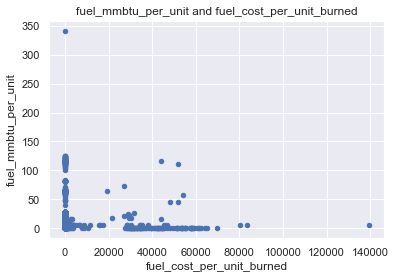

In [20]:
# Investigate the relationship between fuel_mmbtu_per_unit and fuel_cost_per_unit_burned 
fuel_data.plot(kind="scatter", x="fuel_cost_per_unit_burned", y="fuel_mmbtu_per_unit", title="fuel_mmbtu_per_unit and fuel_cost_per_unit_burned")

#### Observation:
* Most values in this relationship reside in the zero mark i.e. as fuel_cost_per_unit burns increases, the fuel_mmbtu_per unit remains stagnant at zero showing no effect by this change and vice versa

In [21]:
# Let look at how the features correlate with each other
fuel_data.corr()

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
utility_id_ferc1,1.000000,0.093323,-0.057447,-0.066946,-0.037863,-0.016414,0.006122
report_year,0.093323,1.000000,0.012952,-0.110853,0.013599,-0.014043,0.010261
fuel_qty_burned,-0.057447,0.012952,1.000000,-0.080946,-0.018535,-0.003551,-0.001896
fuel_mmbtu_per_unit,-0.066946,-0.110853,-0.080946,1.000000,-0.010034,-0.009039,-0.005884
fuel_cost_per_unit_burned,-0.037863,0.013599,-0.018535,-0.010034,1.000000,0.011007,-0.000437
fuel_cost_per_unit_delivered,-0.016414,-0.014043,-0.003551,-0.009039,0.011007,1.000000,-0.000109
fuel_cost_per_mmbtu,0.006122,0.010261,-0.001896,-0.005884,-0.000437,-0.000109,1.000000


#### Observations:
* There are very weak linear relationships (with values very close to 0) between the features in the data

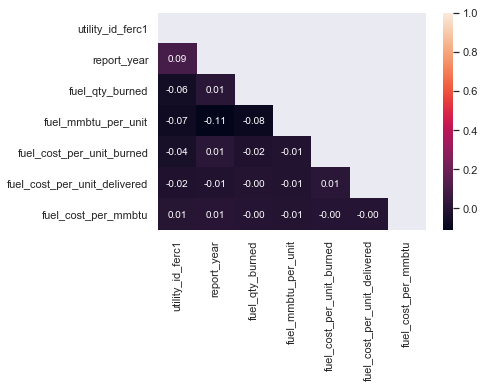

In [22]:
# Plot a heatmap to better visualize this results. 
# Mask the upper triangle to prevent duplicated results and better visiblity

mask = np.triu(fuel_data.corr())
sns.heatmap(fuel_data.corr(), mask=mask, fmt=".2f", annot=True)

#### Observations:
* The heatmap better visualizes the weak relationships between the features

#### More multivariate analysis to analyse some of the relationships in the data

In [23]:
# Closer analysis of fuel_qty_burned
from ipywidgets import widgets

def fuel_burned_scatter(feature):
    fuel_data.plot(kind="scatter", x=feature, y="fuel_qty_burned")
    
cols = {col: col for col in numeric_cols }

widgets.interact(fuel_burned_scatter, feature=cols)

interactive(children=(Dropdown(description='feature', options={'utility_id_ferc1': 'utility_id_ferc1', 'report_year': 'report_year', 'fuel_qty_burned': 'fuel_qty_burned', 'fuel_mmbtu_per_unit': 'fuel_mmbtu_per_unit', 'fuel_cost_per_unit_burned': 'fuel_cost_per_unit_burned', 'fuel_cost_per_unit_delivered': 'fuel_cost_per_unit_delivered', 'fuel_cost_per_mmbtu': 'fuel_cost_per_mmbtu'}, value='utility_id_ferc1'), Output()), _dom_classes=('widget-interact',))

<function __main__.fuel_burned_scatter>

#### Observation:
* There are 3 extremely large values in the relationship that are outliers

In [24]:
# Closer analysis of fuel_cost_per_unit_burned
from ipywidgets import widgets

def fuel_burned_scatter(feature):
    fuel_data.plot(kind="scatter", x=feature, y="fuel_cost_per_unit_burned")
    
cols = {col: col for col in numeric_cols }

widgets.interact(fuel_burned_scatter, feature=cols)

interactive(children=(Dropdown(description='feature', options={'utility_id_ferc1': 'utility_id_ferc1', 'report_year': 'report_year', 'fuel_qty_burned': 'fuel_qty_burned', 'fuel_mmbtu_per_unit': 'fuel_mmbtu_per_unit', 'fuel_cost_per_unit_burned': 'fuel_cost_per_unit_burned', 'fuel_cost_per_unit_delivered': 'fuel_cost_per_unit_delivered', 'fuel_cost_per_mmbtu': 'fuel_cost_per_mmbtu'}, value='utility_id_ferc1'), Output()), _dom_classes=('widget-interact',))

<function __main__.fuel_burned_scatter>

#### Multivariate analysis with categorical variables

In [25]:
# Filter for the categorical features
categorical_cols = fuel_data.columns[fuel_data.dtypes == "object"]

In [26]:
# Before the analysis lets look at the uniques value counts in fuel types
fuel_data["fuel_type_code_pudl"].value_counts()

gas        11486
coal        8547
oil         8064
nuclear      818
waste        441
other        167
Name: fuel_type_code_pudl, dtype: int64

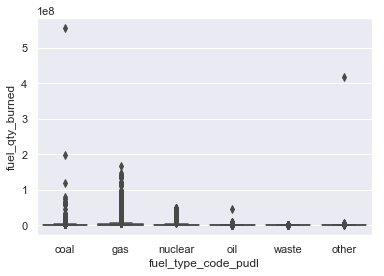

In [32]:
# Plot the fuel type against fuel_qty_burned
sns.boxplot(data=fuel_data, x="fuel_type_code_pudl", y="fuel_qty_burned")

#### Observation:
* With such a large scale, its better to use a bar graph to visualize the results

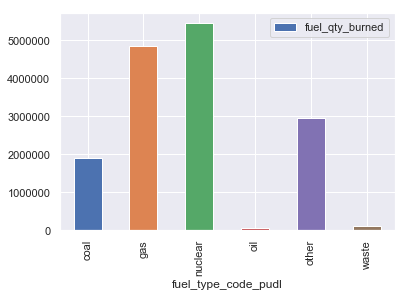

In [31]:
newdf = fuel_data.groupby("fuel_type_code_pudl")["fuel_qty_burned"].mean().reset_index()
newdf.plot(kind="bar", x="fuel_type_code_pudl", y="fuel_qty_burned")

#### Observation:
* Nuclear and Gas have the highest quantity burned

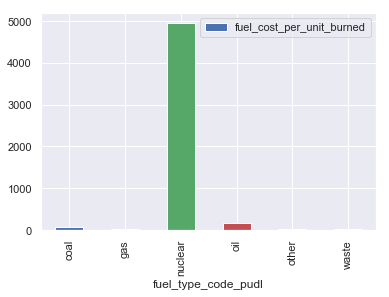

In [33]:
newdf = fuel_data.groupby("fuel_type_code_pudl")["fuel_cost_per_unit_burned"].mean().reset_index()
newdf.plot(kind="bar", x="fuel_type_code_pudl", y="fuel_cost_per_unit_burned")

#### Observation:
* Nuclear energy has the highest fuel cost per unit burned. This makes it very expensive to run a  nuclear plant as the cost associated with it are extremely high

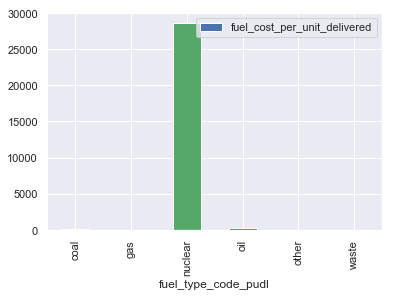

In [34]:
newdf = fuel_data.groupby("fuel_type_code_pudl")["fuel_cost_per_unit_delivered"].mean().reset_index()
newdf.plot(kind="bar", x="fuel_type_code_pudl", y="fuel_cost_per_unit_delivered")

#### Observation:
* As evident above, nuclear energy has the highest costs associated with it. Its extremely expensive to deliver a unit of nuclear energy compared to the other forms of energy

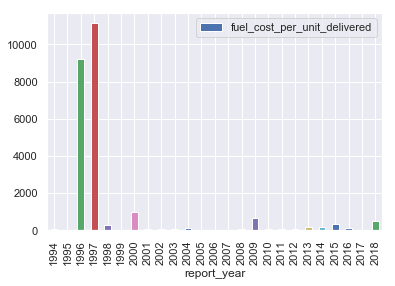

In [35]:
# Lets check for any seasonal trend in the data
newdf = fuel_data.groupby("report_year")["fuel_cost_per_unit_delivered"].mean().reset_index()
newdf.plot(kind="bar", x="report_year", y="fuel_cost_per_unit_delivered")